<a href="https://colab.research.google.com/github/chrismaelabd/chrismaelabd/blob/main/Python_Visualizations_Pt_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizations with Python 101 - Part 1

## Learning Objectives

- Discuss an overview of the types of visualizations available.
- Discuss which types of visuals are best for showing what type of information/comparisons.

- Discuss the Anatomy of a Matplotlib Figure

- Discuss the many ways to create/start a figure
    - Matplotlib plt functions
    - Matploltib OOP interface
    - Pandas
    - Seaborn


## Data Visualization Overview

- We use visualizations to tell a story about our data. 
    - Knowing which visualization is best to tell the story you are trying to tell is an important skill. 


- Let's Explore Different Types of Visualizations and when they are most appropriate to use. 

    - **[The Data Viz Project](https://datavizproject.com/)**

    - **[Python Graph Gallery](https://www.python-graph-gallery.com/)**

    - [Blog Post: How to Choose a Chart Type](https://towardsdatascience.com/data-visualization-101-how-to-choose-a-chart-type-9b8830e558d6)




### Example Galleries [Python Packages]
Let's explore the Python-specific options available to us. 



- [Matplotlib Example Gallery](https://matplotlib.org/gallery/index.html#examples-index) 
- [Seaborn Example Gallery](https://seaborn.pydata.org/examples/index.html)
- [Pandas Visualization docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)


# Using Visualizations for Exploratory Data Analysis (EDA)

### The Questions to Answer

1. What is the distribution of house prices in Ames, Iowa?
    - What is the median home price?
    - What is the average home price?
    
2. Are there any potential outliers in home price?

### The Provided Data

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cols_to_use = ['YrSold', 'MoSold', 'Fireplaces', 'TotRmsAbvGrd', 'GrLivArea',
          'FullBath', 'YearRemodAdd', 'YearBuilt', 'OverallCond', 
          'OverallQual', 'LotArea', 'SalePrice','BldgType']

df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSECHeeoC-lvBG1TA-1DXC5m2VKZ5QqwKRBSTOBW_ivkl40nvNDBYpNzq4X6jmWSzatT4Sr2K-K4Ou2/pub?output=csv",
                usecols=cols_to_use
                )
display(df.head())
df.info()

# The Many Ways of Making a Figure in Python

- There are MANY ways to make data visualizations with Python. 
- Today, we will focus on non-interactive visualizations.( Sorry, Plotly Express :*-( )

- The ~4 Different Ways to Plot with Python:

    1. Matplotlib plt functions:
        - `plt.plot`/`plt.bar`,`plt.hist`, etc.      
    2. Matploltib OOP interface:
       ```python 
       fig, ax =plt.subplots()
       ax.plot#/ax.hist, ax.bar, etc
        ```
        
    3. Pandas:
        ```python
        # using .plot
         ax = df.plot(kind='hist)

         # using .hist
         ax = df.hist(bins='auto')
        ```
        
    4. Seaborn:
        ```python
         sns.histplot(data=df,x='Price')
         sns.regplot(data=df,x='Sqft',y='Price
        ```  

- **All 4 of these approaches to making figures with Python ultimately use matplotlib behind the scenes.**

> For this section of the notebook, we will focus on answering one question in each of the 4+ different ways. 
> #### Q1: What is the distribution of house prices in Ames, Iowa?

## Method 01: Using Matplotlib Plt Functions

- Select the correct plt function and plot the data.
- Make sure that:
    - We have an xlabel,ylabel, and title.
    - the figure is large enough
- Add a vertical line for the mean, including a label with the mean. 
    - Make sure its: 
        - Different color than the bars
        - a dotted line
- Add a legend 

#### Plot 1: Sale Price Distribution

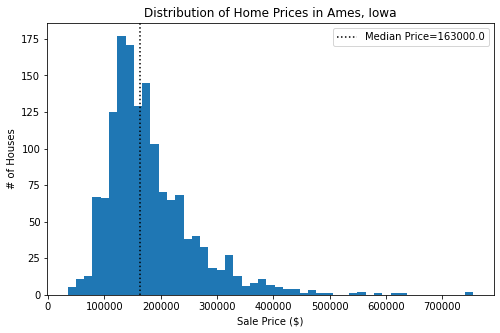

In [ ]:
#Plot 1: Sale Price Distribution
plt.figure(figsize=(8,5))
plt.hist(df['SalePrice'], bins='auto')
plt.ylabel("# of Houses")
plt.xlabel("Sale Price ($)")
plt.title("Distribution of Home Prices in Ames, Iowa")
plt.axvline(df['SalePrice'].median(), color="k", ls=":", label=f"Median Price={round(df['SalePrice'].median(),2)}")
plt.legend();

## Method 02: Using Matplotlib OOP Interface

#### A Tale of Two Syntaxes
-  *Matplotlib is powerful but can be a bit confusing at times because of its 2 sets of commands:*
    - the matplotlib.pyplot functions (`plt.bar()`,`plt.title()`)
    - the object_oriented methods (`ax.bar()`,`ax.set_title()`)
    
- The 2 syntaxes can be confusing at first and cause problems & odd results when mixed together.
    - Learn about some of the problems when mixing types.
    - Example: see how plt.title()/plt.xlabel(),etc. can behave strangely in subplots.
    
    - **Bookmark this article, its the best explanation of how matploblib'S 2 interfaces work:**
> ["Artist" in Matplotlib - something I wanted to know before spending tremendous hours on googling how-tos.](https://dev.to/skotaro/artist-in-matplotlib---something-i-wanted-to-know-before-spending-tremendous-hours-on-googling-how-tos--31oo)<br>

<!-- - [My Blog Post on Making Customized Figures in seaborn](https://jirvingphd.github.io/harnessing_seaborn_subplots_for_eda)
    - This covers some concepts we didn't have time to cover, like ticklabel formatters. -->

>- ***So... what are "object-oriented-methods" anyway?***

### OOP Crash Course

- **Object-Oriented Programming (OOP):**
    - OOP is all about working with Classes, which are the blueprints for a type of variable. 
    - Objects/classes can have functions that are attached to the object. 
        - When a function is attached to a class its called a **method**
    - Object can also store variables inside themselves. 
        - When a variable is attached to an object it is called an **attribute**
        
        
- OOP Examples You already Know:
    - `pd.DataFrame` is a class
    - `df = pd.DataFrame(...)` creates a dataframe object.
    - DataFrames have **atrributes**:
        - `df.columns`
        - `df.index`
        - `df.dtypes`
    - DataFrames have **methods**
        - `df.head()`
        - `df.sort_values()`
        - `df.info()`
        - `df.dropna()`
        - `df.plot()`
        
        
- You will learn about classes in Phase 3.
        

### Anatomy of a Matplotlib Figure



<center><img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/matplotlib_anatomy.png" width=400></center>

- Matplotlib Figures are composed of 3 different types of objects:
    - `Figure` is the largest bucket and contains everything else. It is like a picture frame without any actual images in it.
  - `Axes` are the actual plot / image inside of the Figure / frame. 
        - this is the same `ax` as in `fig, ax = plt.subplots()` and that is returned when you create a Pandas or Seaborn figure.
        - There is an 'Axes` for each subplot in the Figure

        

In [ ]:
## Make an empty figure and ax with plt.subplots


In [ ]:
## Run help on fig 


#### Anatomy of an Axes
- `Axes` contain information about the titles, labels, grid,background, they also contain an. See the figure below for the contents of `Axes`
- Inside Axes there is an `Axis` which is further divided into an `Axis.xaxis` and an `Axis.yaxis` that contain the ticks and the tick lables.

    <center><img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/matplotlib_Axes_layout2.png" width=500></center>
    
- However, axes do NOT actually contain the VISUAL for the figure, just the information.
  

In [ ]:
# Run help on ax


#### Now, let's make our figure with Method 02

In [ ]:
#Plot 1: Sale Price Distribution - OOP


> Note: if you don't need to customize fonts, you can **combine all `ax.set_xxxx(` commands (`ax.set_title`,`ax.set_xlabel`, etc) into 1 `ax.set()`

In [ ]:
#Plot 1: Sale Price Distribution - OOP with ax.set()


## Method 03: Plot with Pandas

- Pandas's dataframes and series have a `.plot()` method
    - [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
    - The `kind` argument lets us specify if we want: 
        - "scatter"
        - "hist"
        - "bar"
        - "barh"
        - etc.
    - There are also some additional plotting methods:
        - e.g.: `df.hist()`

In [ ]:
#Plot 1: Sale Price Distribution - pandas .plot kind=hist


>- Unfortunately .plot isn't perfect, which is why we also have `df.hist`

In [ ]:
#Plot 1: Sale Price Distribution - pandas .hist


## Method 04: Seaborn

- Seaborn has 2 different kinds of plotting functions. Basic ones that return an ordinary matplotlib axis and fancy/advanced ones that return an object called a "FacetGrid"


- Basic Functions (return an `ax`)
    ```python
    sns.histplot
    sns.regplot
    sns.scatter
    ```
- Advanced Functions (return a `FacetGrid`)
    ```python
    sns.lmplot
    sns.catplot
    sns.jointplot
    ```
    
- We will make our histogram 2 different ways with Seaborn. 
    - The simpler `sns.histplot` function.
    - The complex `sns.displot` function

### Seaborn - Simple Plot (returns an ax)

In [ ]:
## PLot 1 - seaborn histplot


### Seaborn - Advanced Plot (returns a FacetGrid)

In [ ]:
## PLot 1 - seaborn displot


# Final Visualizations

## Q1: What is the distribution of home prices in Ames, Iowa?


In [ ]:
## select our favorite approach from above
## PLot 1 - seaborn histplot


## Q2: Are there any outliers in terms of home prices?

In [ ]:
## Using seaborn


In [ ]:
## Using pandas
